<a href="https://colab.research.google.com/github/Mayur-666/Computer_Vision/blob/main/Assignment_2_KNN_Decision_Boundaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

In [12]:
# Loading the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features
y = iris.target

In [13]:
# Creating color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [14]:
# Define KNN function
def plot_knn_decision_boundaries(k, ax):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    # Plot the decision boundary by assigning a color to each point in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f"KNN for (k = {k})")
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

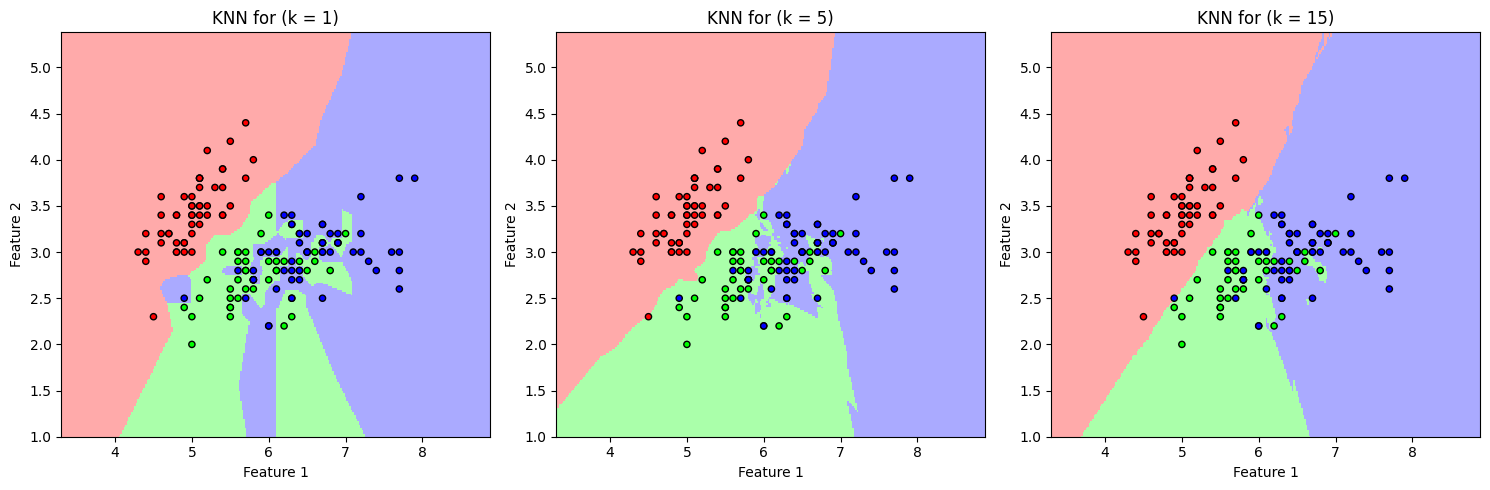

In [15]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot decision boundaries for k=1, k=5, and k=15
plot_knn_decision_boundaries(1, axs[0])
plot_knn_decision_boundaries(5, axs[1])
plot_knn_decision_boundaries(15, axs[2])

plt.tight_layout()
plt.show()